In [36]:
# ипрортируем библиотеки

import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import ydata_profiling
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
# загружаем набор данных
data = pd.read_excel('C://Users/alex1/Downloads/32_052019.xlsx')
data_copy = data.copy()
data_copy.columns = data_copy.columns.str.strip()
data_copy
#Посмотрел датафрейм

,Код станции отправления,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Отд. ж/д отгрузки,Код станции назначения,Станция назначения,Регион поставки,Ж/Д поставки,Отд. ж/д поставки,...,Станция отправления загран,Код станции отправления загран,Станция назначения загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения
0,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
1,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
2,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
3,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН
4,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93320,АНГАСОЛКА,ИРКУТСКАЯ ОБЛАСТЬ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36189,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36190,94960,ЗИЛОВО,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,95050,СБЕГА,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36191,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ


In [38]:
def x(s):
    if len(str(s)) == 3:
      
        
        return str('0'+str(s))
    return str(s)
data_copy['Дата отгрузки'] = data_copy['Дата отгрузки'].apply(x)
data_copy['Дата прибытия'] = data_copy['Дата прибытия'].apply(x)



In [65]:
data_copy.columns

Index(['Код станции отправления', 'Станция отправления', 'Регион отгрузки',
       'Ж/Д отгрузки', 'Отд. ж/д отгрузки', 'Код станции назначения',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки',
       'Отд. ж/д поставки', 'Код Клиента', 'Клиент', 'Код отправителя груза',
       'ОКПО отправителя', 'Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'Код получателя груза',
       'ОКПО получателя', 'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Дата отгрузки', 'Дата прибытия',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загран',
       'Код станции 

In [84]:
data_copy.shape

(36193, 48)

In [39]:
data_copy = data_copy.drop_duplicates()
data_copy.shape
# обнаружено 3 дубликата

(36191, 48)

In [104]:
# Проверил на аномальные значения
from sklearn.ensemble import IsolationForest
import pandas as pd
mmm = data_copy.copy()
# Загрузка данных
mmm.dropna(inplace=True)
label_endcoder = LabelEncoder()


for i in mmm.columns:
    
    if i not in  ['Dostavka_3_day','Разница в днях','Тонно-километры','Вес груза, тонн']: 
        mmm[i] = label_endcoder.fit_transform(mmm[i])
train_copy_enc
# Выбор признаков для обучения модели
features = ['Код станции отправления', 'Станция отправления', 'Регион отгрузки',
       'Ж/Д отгрузки', 'Отд. ж/д отгрузки', 'Код станции назначения',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки',
       'Отд. ж/д поставки', 'Код Клиента', 'Клиент',
       'Код отправителя груза', 'ОКПО отправителя', 'Отправитель',
       'ФИО Руководителя Отправителя', 'Почтовый индекс Отправителя',
       'Адрес Отправителя', 'Тел. Отправителя', 'E-mail Отправителя',
       'Факс Отправителя', 'Код получателя груза', 'ОКПО получателя',
       'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Дата отгрузки', 'Дата прибытия',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загран',
       'Код станции назначения загран', 'Отч мес', 'Отч год',
       'Код страны отправления', 'Страна отправления', 'Код страны назначения',
       'Страна назначения']

# Создание и обучение модели Isolation Forest
model = IsolationForest(contamination=0.1)  # устанавливаем уровень загрязнения (долю аномалий)
model.fit(mmm[features])

# Предсказание аномалий
mmm['anomaly'] = model.predict(mmm[features])
anomalies = mmm[mmm['anomaly'] == -1]  # выбор только аномальных точек

# Вывод результатов
print(anomalies)

       Код станции отправления  Станция отправления  Регион отгрузки  \
12298                        1                    0                1   
12306                        1                    0                1   

       Ж/Д отгрузки  Отд. ж/д отгрузки  Код станции назначения  \
12298             0                  1                       2   
12306             0                  1                       4   

       Станция назначения  Регион поставки  Ж/Д поставки  Отд. ж/д поставки  \
12298                   1                4             1                  4   
12306                   0                0             0                  0   

       ...  Код станции отправления загран  Станция назначения загран  \
12298  ...                               0                          0   
12306  ...                               0                          0   

       Код станции назначения загран  Отч мес  Отч год  \
12298                              0        0        0   
12306     

In [47]:
mmm.columns

Index(['Код станции отправления', 'Станция отправления ', 'Регион отгрузки ',
       'Ж/Д отгрузки ', 'Отд. ж/д отгрузки ', 'Код станции назначения',
       'Станция назначения ', 'Регион поставки ', 'Ж/Д поставки ',
       'Отд. ж/д поставки ', 'Код Клиента ', 'Клиент ',
       'Код отправителя груза', 'ОКПО отправителя', 'Отправитель',
       'ФИО Руководителя Отправителя', 'Почтовый индекс Отправителя',
       'Адрес Отправителя', 'Тел. Отправителя', 'E-mail Отправителя',
       'Факс Отправителя', 'Код получателя груза ', 'ОКПО получателя',
       'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза ',
       'Наименование груза ', 'Вес груза, тонн ', 'Количество вагонов ',
       'Тонно-километры', 'Дата отгрузки ', 'Дата прибытия ',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загра

<AxesSubplot: >

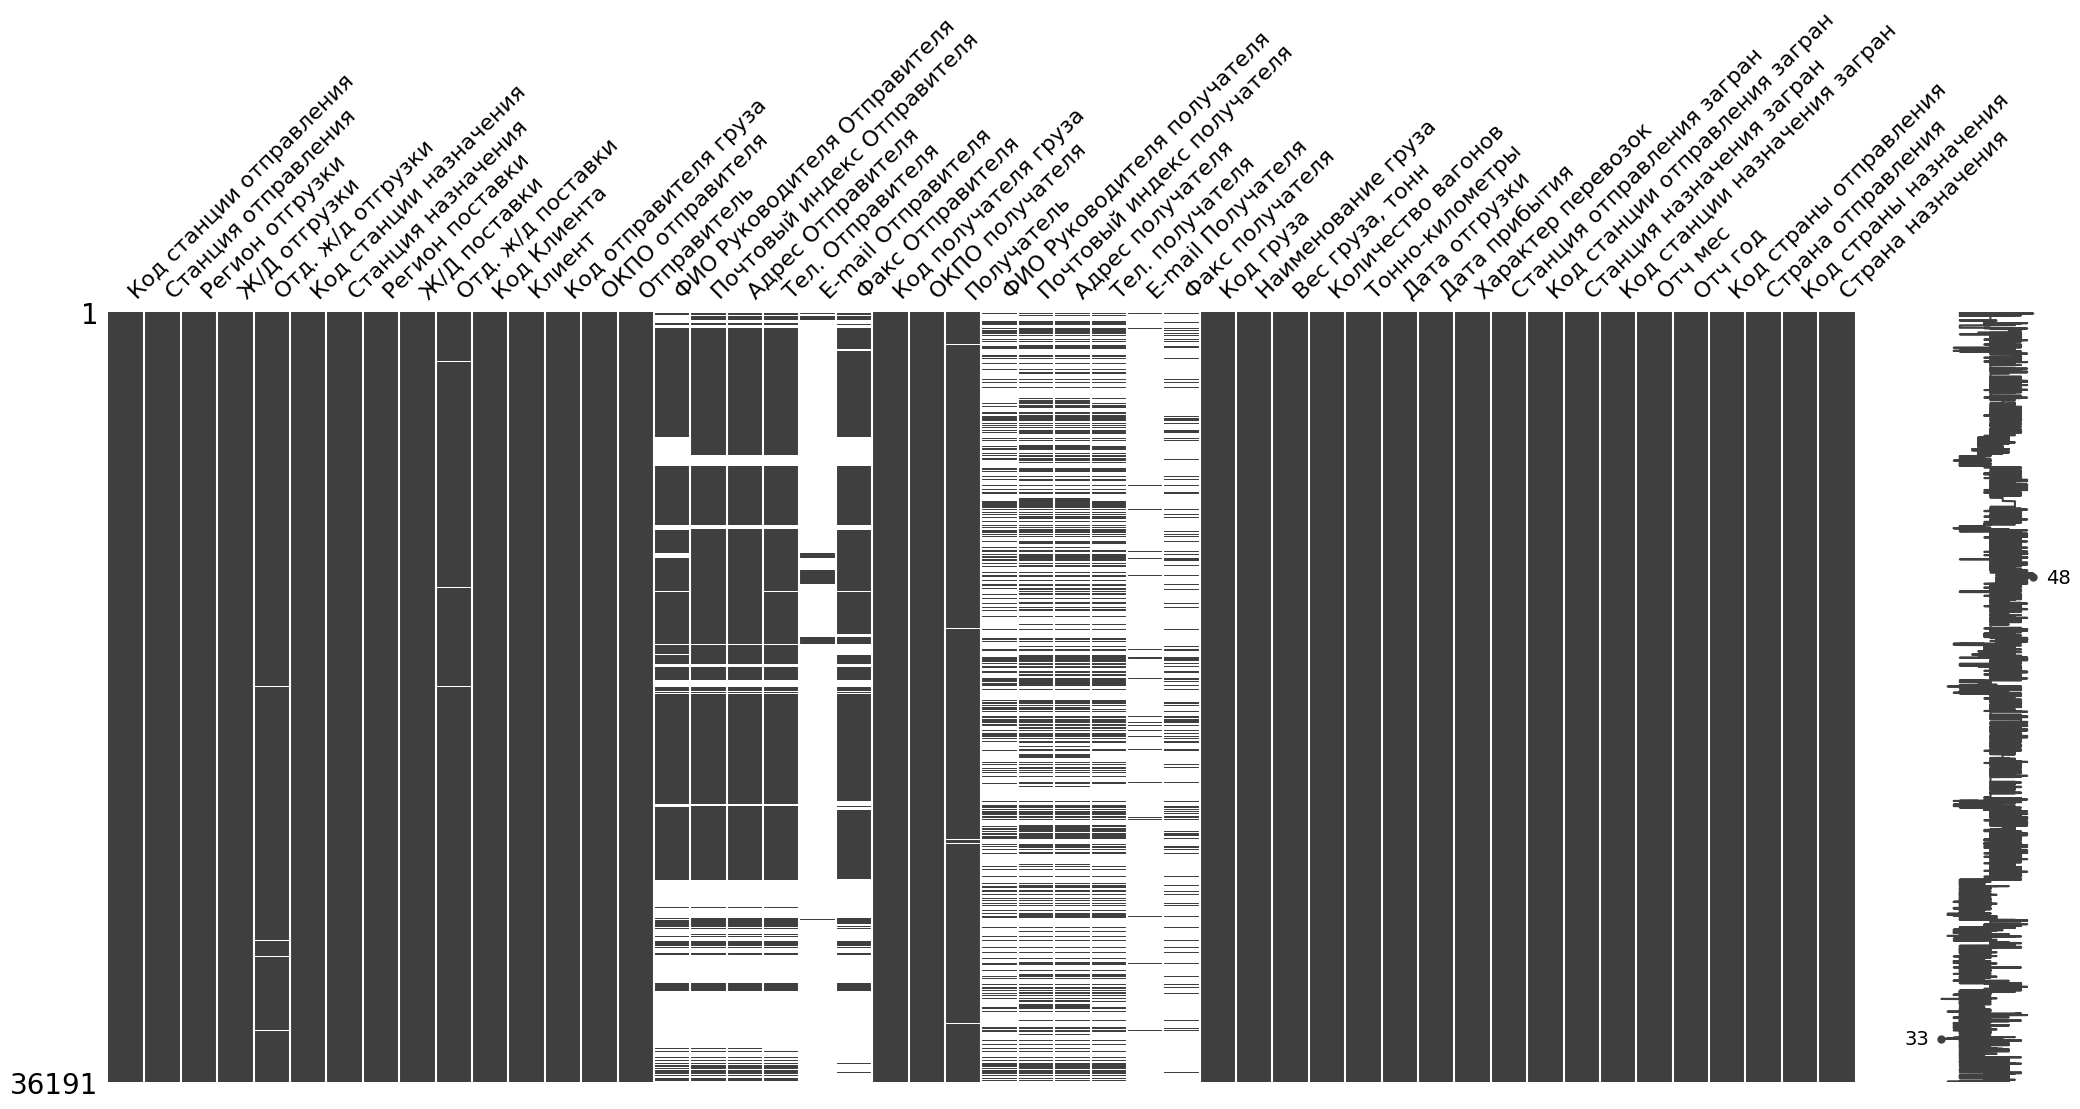

In [53]:
msn.matrix(data_copy)
#построил матрицу Null значений

In [40]:
df = data_copy.copy()
df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format='%d%m')
df['Дата прибытия'] = pd.to_datetime(df['Дата прибытия'], format='%d%m')

# Вычиcляем разницу и преобразуйте в дни
df['Разница в днях'] = (df['Дата прибытия'] - df['Дата отгрузки']).dt.days

# Выведем результат
print(df.head())

   Код станции отправления   Станция отправления      Регион отгрузки  \
0                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
1                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
2                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
3                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
4                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   

        Ж/Д отгрузки Отд. ж/д отгрузки  Код станции назначения  \
0  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
1  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
2  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
3  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
4  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   

        Станция назначения Регион поставки       Ж/Д поставки  \
0  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙСКИЙ КРАЙ  Западно-Сибирская   
1  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙС

In [ ]:
df.describe()

In [41]:

df['Dostavka_3_day'] = df.apply(lambda row: 1 if row['Разница в днях'] >3 else 0 , axis = 1)


In [163]:
for column in df.columns:
    nan_count = df[column].isnull().sum()
    total_count = len(df[column])
    percentage = nan_count/total_count*100
    print(f'Процент NaN значений в столбце {column} равен {percentage}%')
# вывод процента пропущеннных значений по столбцам  

Процент NaN значений в столбце Код станции отправления равен 0.0%
Процент NaN значений в столбце Станция отправления равен 0.0027631179022408886%
Процент NaN значений в столбце Регион отгрузки равен 0.0027631179022408886%
Процент NaN значений в столбце Ж/Д отгрузки равен 0.0027631179022408886%
Процент NaN значений в столбце Отд. ж/д отгрузки равен 0.29841673344201597%
Процент NaN значений в столбце Код станции назначения равен 0.0%
Процент NaN значений в столбце Станция назначения равен 0.0027631179022408886%
Процент NaN значений в столбце Регион поставки равен 0.0027631179022408886%
Процент NaN значений в столбце Ж/Д поставки равен 0.0027631179022408886%
Процент NaN значений в столбце Отд. ж/д поставки равен 0.696305711364704%
Процент NaN значений в столбце Код Клиента равен 0.0%
Процент NaN значений в столбце Клиент равен 0.0%
Процент NaN значений в столбце Код отправителя груза равен 0.0%
Процент NaN значений в столбце ОКПО отправителя равен 0.0%
Процент NaN значений в столбце Отпра

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36193 entries, 0 to 36192
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Код станции отправления         36193 non-null  int64         
 1   Станция отправления             36192 non-null  object        
 2   Регион отгрузки                 36192 non-null  object        
 3   Ж/Д отгрузки                    36192 non-null  object        
 4   Отд. ж/д отгрузки               36085 non-null  object        
 5   Код станции назначения          36193 non-null  int64         
 6   Станция назначения              36192 non-null  object        
 7   Регион поставки                 36192 non-null  object        
 8   Ж/Д поставки                    36192 non-null  object        
 9   Отд. ж/д поставки               35941 non-null  object        
 10  Код Клиента                     36193 non-null  int64         
 11  Кл

In [42]:
df = df[df['Регион поставки'] != 'ГОРОД МОСКВА СТОЛИЦА РФ']
df = df[df['Регион поставки'] != 'МОСКОВСКАЯ ОБЛАСТЬ']
df = df[df['Регион поставки'] != 'ГОРОД САНКТ-ПЕТЕРБУРГ']
# отсортировал реигон поставки по условию
df

,Код станции отправления,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Отд. ж/д отгрузки,Код станции назначения,Станция назначения,Регион поставки,Ж/Д поставки,Отд. ж/д поставки,...,Станция назначения загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения,Разница в днях,Dostavka_3_day
0,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ,1,0
1,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ,2,0
2,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ,1,0
3,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН,2,0
4,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93320,АНГАСОЛКА,ИРКУТСКАЯ ОБЛАСТЬ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,1,0
36189,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,0,0
36190,94960,ЗИЛОВО,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,95050,СБЕГА,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,...,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,2,0
36191,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,...,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,2,0


In [43]:

train_copy = df.copy()
drop_col = []
for i in train_copy.columns:
    if 'Код' in i:
        drop_col.append(i)

train_copy

,Код станции отправления,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Отд. ж/д отгрузки,Код станции назначения,Станция назначения,Регион поставки,Ж/Д поставки,Отд. ж/д поставки,...,Станция назначения загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения,Разница в днях,Dostavka_3_day
0,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ,1,0
1,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ,2,0
2,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ,1,0
3,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН,2,0
4,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93320,АНГАСОЛКА,ИРКУТСКАЯ ОБЛАСТЬ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,1,0
36189,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,0,0
36190,94960,ЗИЛОВО,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,95050,СБЕГА,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,...,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,2,0
36191,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,...,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,2,0


In [44]:
train_copy = train_copy.drop(drop_col,axis = 1)
train_copy = train_copy.drop(['ФИО Руководителя получателя','Адрес получателя','Почтовый индекс получателя','Тел. получателя','E-mail Получателя','Факс получателя','Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'ОКПО получателя','Отд. ж/д отгрузки','Отд. ж/д поставки',
       'Получатель','Дата отгрузки', 'Дата прибытия'],axis = 1)
train_copy_enc = train_copy.copy()

In [92]:
train_copy_enc.columns

Index(['Станция отправления', 'Регион отгрузки', 'Ж/Д отгрузки',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки', 'Клиент',
       'ОКПО отправителя', 'Наименование груза', 'Вес груза, тонн',
       'Количество вагонов', 'Тонно-километры', 'Характер перевозок',
       'Станция отправления загран', 'Станция назначения загран', 'Отч мес',
       'Отч год', 'Страна отправления', 'Страна назначения', 'Разница в днях',
       'Dostavka_3_day'],
      dtype='object')

<AxesSubplot: >

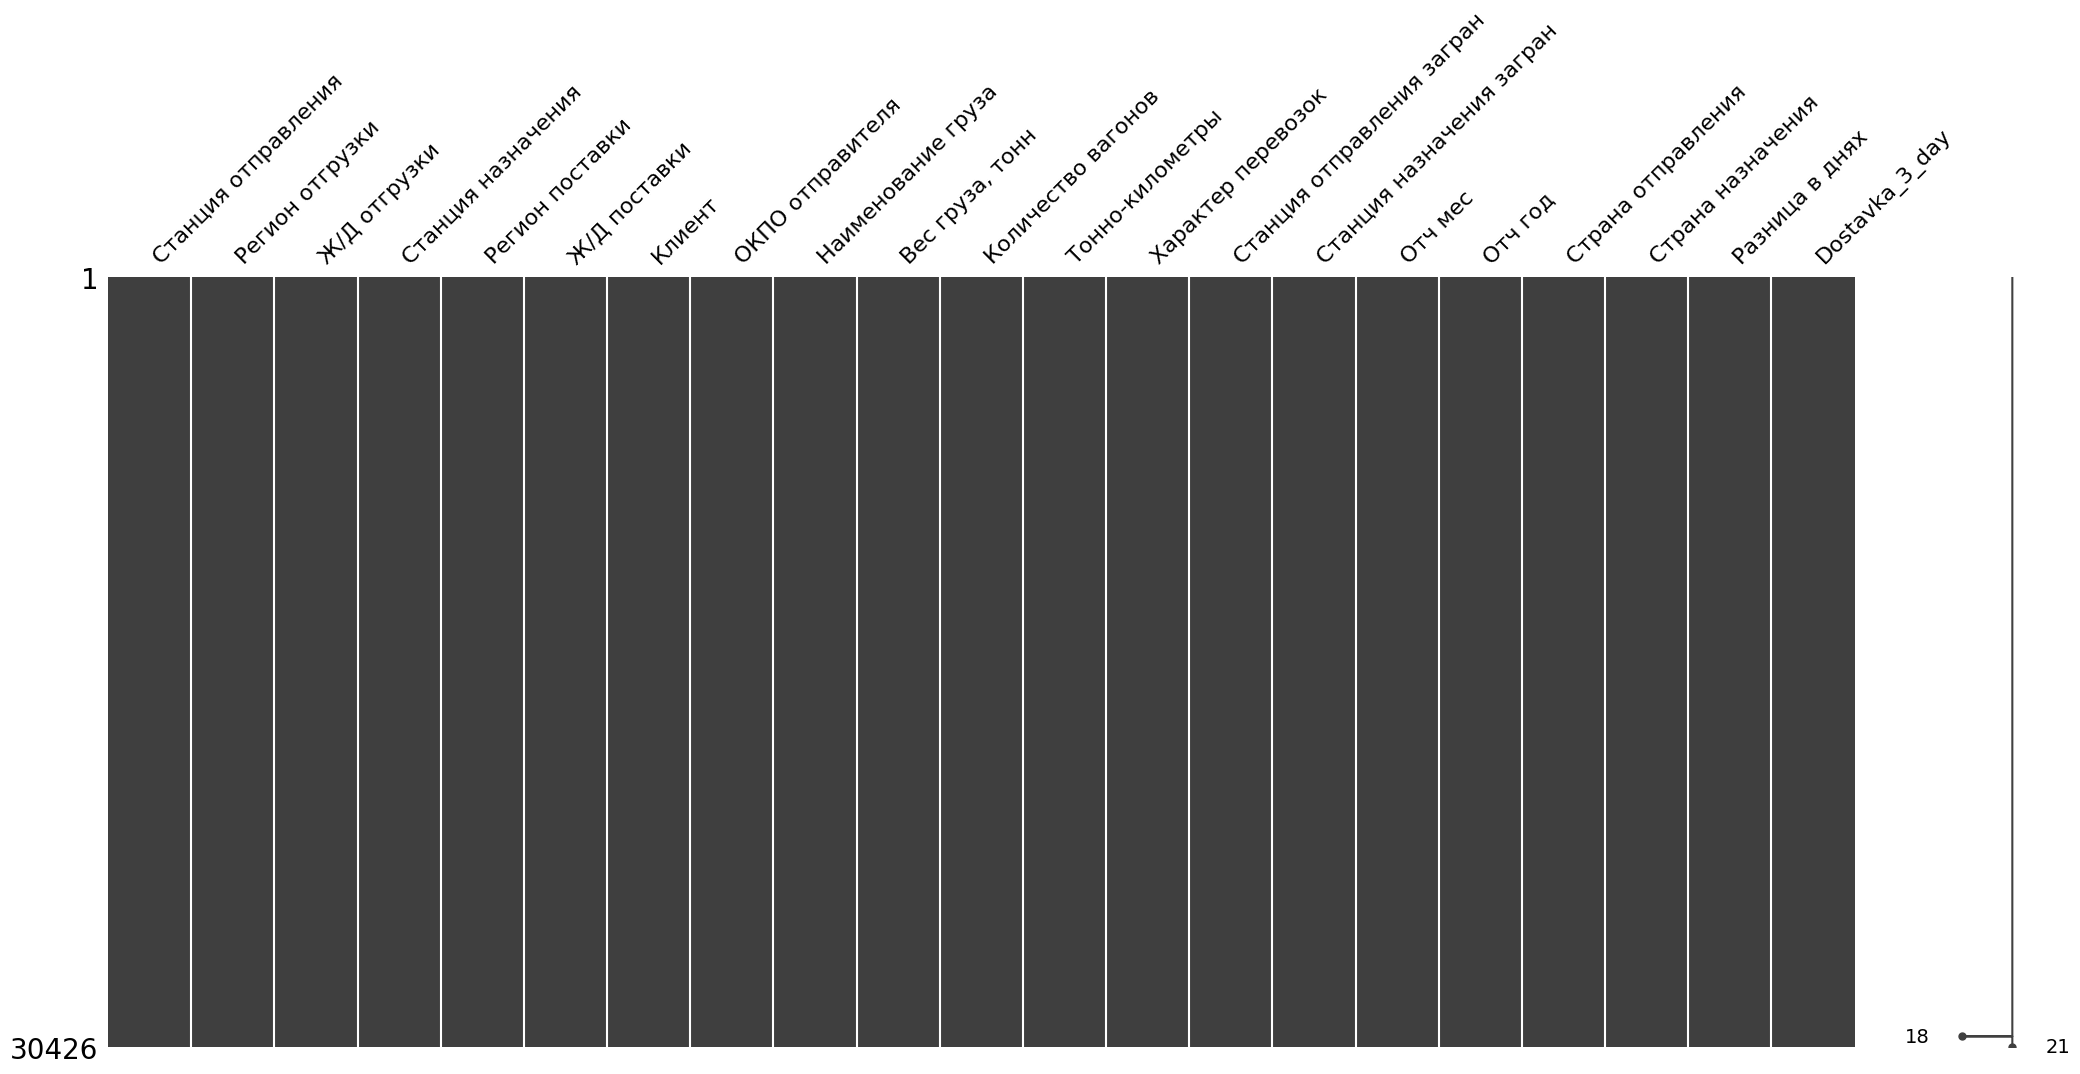

In [93]:
msn.matrix(train_copy_enc)
#построил матрицу Null значений. После отсеивания столбцов не влияющих на целевую переменную, остались столбцы с небольшим количеством пустых значений
#null значения будут заменены на моду 

In [25]:
train_copy_enc.describe()

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Код станции отправления загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Код страны назначения,Разница в днях,Dostavka_3_day
count,30428.000000,30428.000000,3.042800e+04,30428.000000,3.042800e+04,30428.000000,30428.000000,30428.000000,30428.000000,3.042800e+04,30428.000000,30428.000000,30428.0,30428.0,30428.000000,30428.000000,30428.000000,30428.000000
mean,63831.836795,61679.663797,1.489743e+09,5034.674576,1.191130e+07,5073.216938,32363.026259,161.666091,3.506934,2.005449e+05,15522.338635,14205.755883,5.0,19.0,143.732615,131.693144,6.185454,0.663106
std,23697.413384,26290.311003,1.531529e+09,1977.809151,2.291690e+07,2695.150612,90.100251,299.673886,8.186671,5.966056e+05,29065.670607,27495.158351,0.0,0.0,264.782363,258.487066,9.162093,0.472656
min,1300.000000,1000.000000,0.000000e+00,35.000000,0.000000e+00,12.000000,32101.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.0,19.0,0.000000,0.000000,-26.000000,0.000000
25%,43970.000000,43970.000000,1.000234e+09,3438.000000,1.864240e+05,2895.000000,32307.000000,63.870000,1.000000,4.899900e+04,0.000000,0.000000,5.0,19.0,0.000000,0.000000,3.000000,0.000000
50%,78020.000000,65430.000000,1.001351e+09,5010.000000,1.866310e+05,5084.000000,32411.000000,67.930000,1.000000,1.042265e+05,0.000000,0.000000,5.0,19.0,0.000000,0.000000,5.000000,1.000000
75%,81760.000000,81450.000000,1.003305e+09,5865.000000,5.757848e+06,7095.000000,32416.000000,134.440250,2.000000,1.926695e+05,0.000000,0.000000,5.0,19.0,0.000000,0.000000,8.000000,1.000000
max,99630.000000,99810.000000,7.000118e+09,9999.000000,9.995542e+07,9999.000000,32423.000000,7344.600000,118.000000,3.580672e+07,98610.000000,98610.000000,5.0,19.0,840.000000,860.000000,65.000000,1.000000


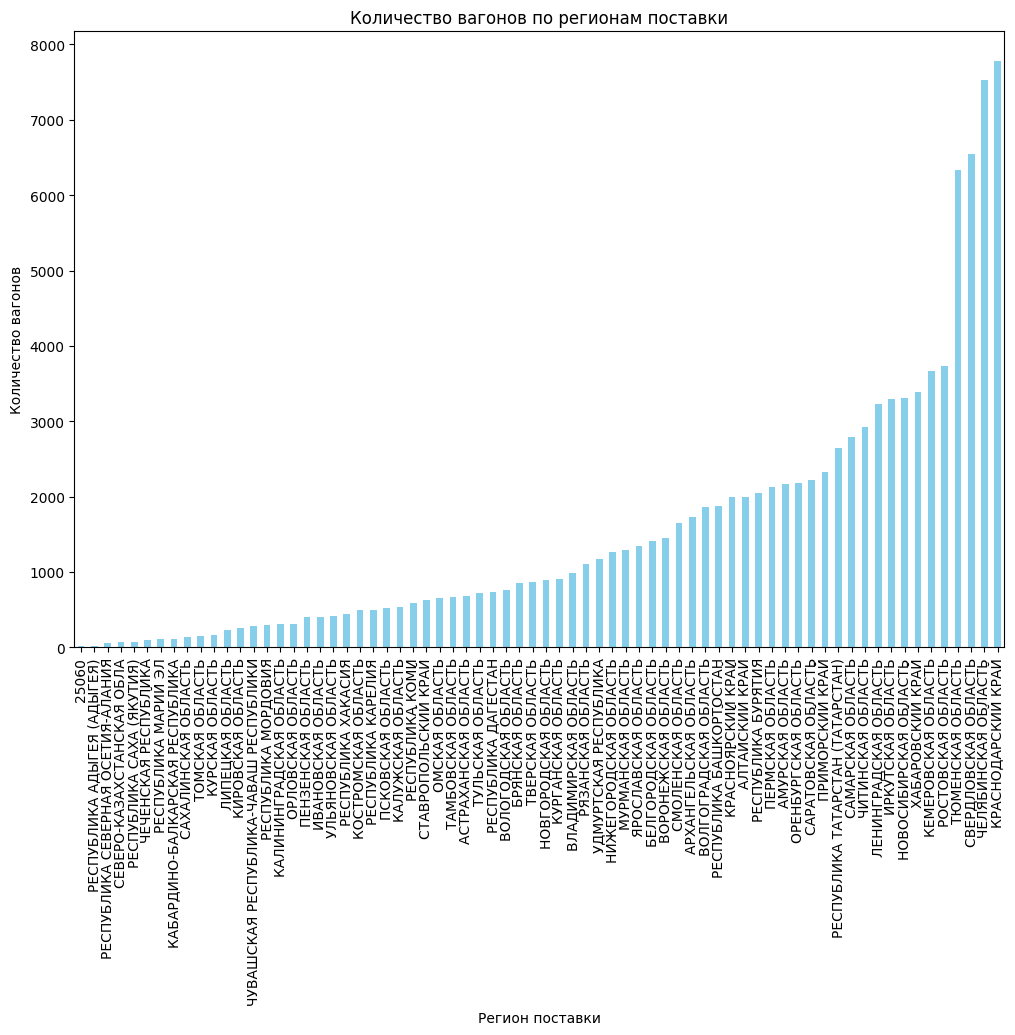

In [132]:
grouped_data = train_copy_enc.groupby('Регион поставки')['Количество вагонов'].sum().sort_values()
# Создание графика
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Количество вагонов по регионам поставки')
plt.xlabel('Регион поставки')
plt.ylabel('Количество вагонов')
plt.show()

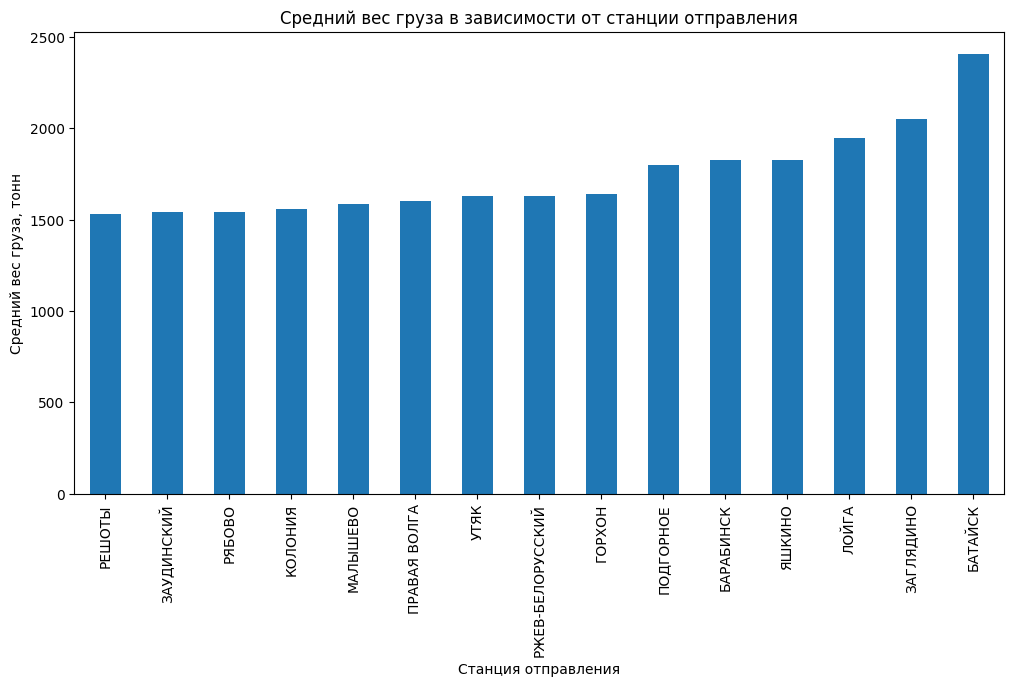

In [134]:
# Группируем данные по станции отправления и вычисляем средний вес груза
average_weight_by_station = train_copy_enc.groupby('Станция отправления')['Вес груза, тонн'].mean()
average_weight_by_station = average_weight_by_station.sort_values().tail(15)
# Строим график
plt.figure(figsize=(12, 6))
average_weight_by_station.plot(kind='bar')
plt.title('Средний вес груза в зависимости от станции отправления')
plt.xlabel('Станция отправления')
plt.ylabel('Средний вес груза, тонн')
plt.show()


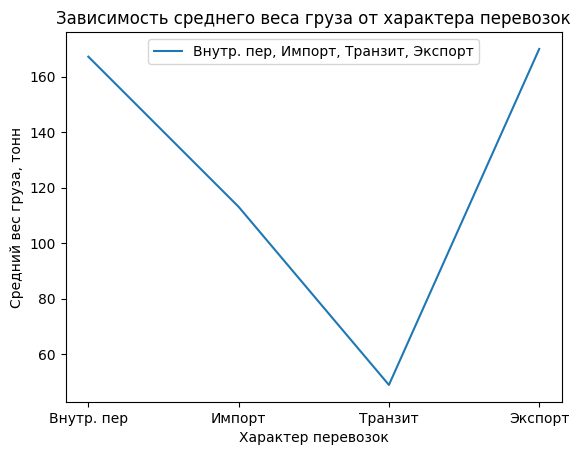

In [115]:
data = train_copy_enc.copy()[['Наименование груза', 'Характер перевозок','Вес груза, тонн']]

#Группировка данных по характеру перевозок
grouped = data.groupby('Характер перевозок')

#Вычисление среднего веса груза для каждого характера перевозок
means = grouped.mean()['Вес груза, тонн']

#Создание списка характеров перевозок
characters = grouped.groups.keys()

#Преобразование списка характеров перевозок в строку для использования в качестве подписей на оси x графика
characters = ', '.join(characters)

#Построение графика
plt.figure()
plt.plot(means, label=characters)
plt.xlabel('Характер перевозок')
plt.ylabel('Средний вес груза, тонн')
plt.title('Зависимость среднего веса груза от характера перевозок')
plt.legend()
plt.show()

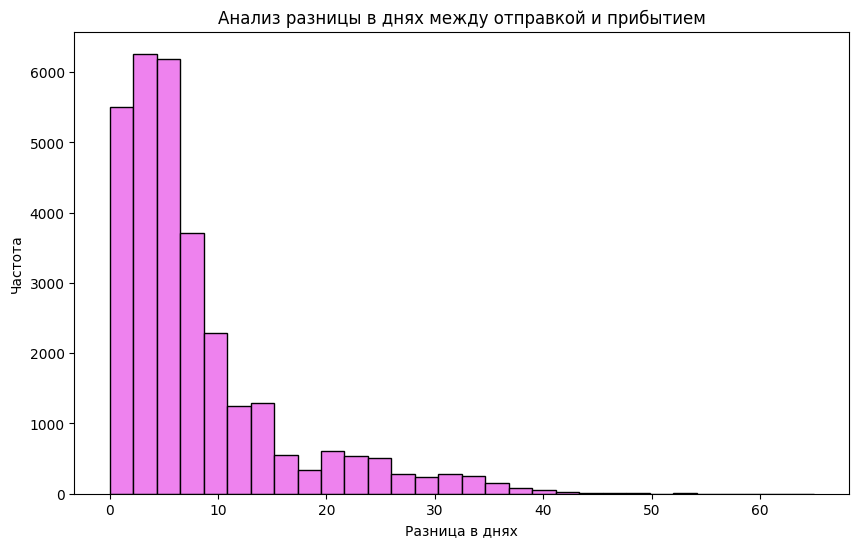

In [146]:
plt.figure(figsize=(10, 6))
plt.hist(train_copy_enc['Разница в днях'], bins=30, color='violet', edgecolor='black')
plt.title('Анализ разницы в днях между отправкой и прибытием')
plt.xlabel('Разница в днях')
plt.ylabel('Частота')
plt.show()

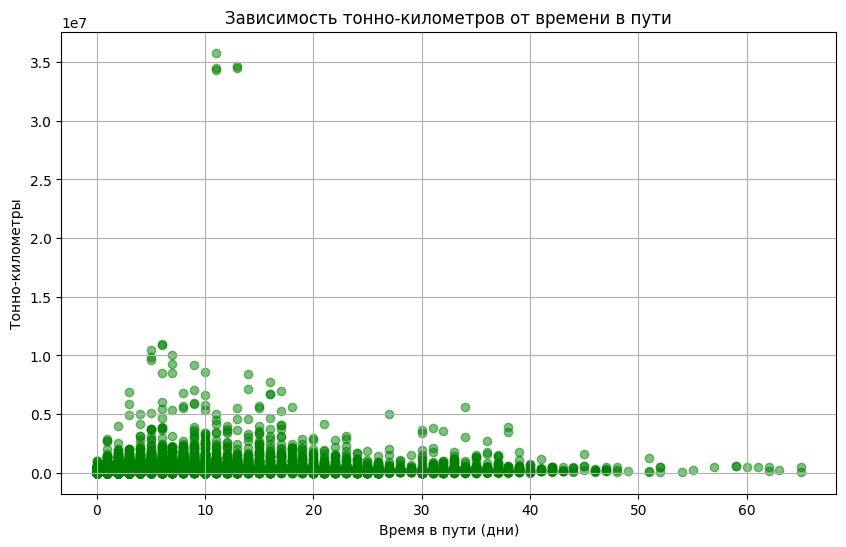

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(train_copy_enc['Разница в днях'], train_copy_enc['Тонно-километры'], alpha=0.5, c = 'g')
plt.title('Зависимость тонно-километров от времени в пути')
plt.xlabel('Время в пути (дни)')
plt.ylabel('Тонно-километры')
plt.grid(True)
plt.show()

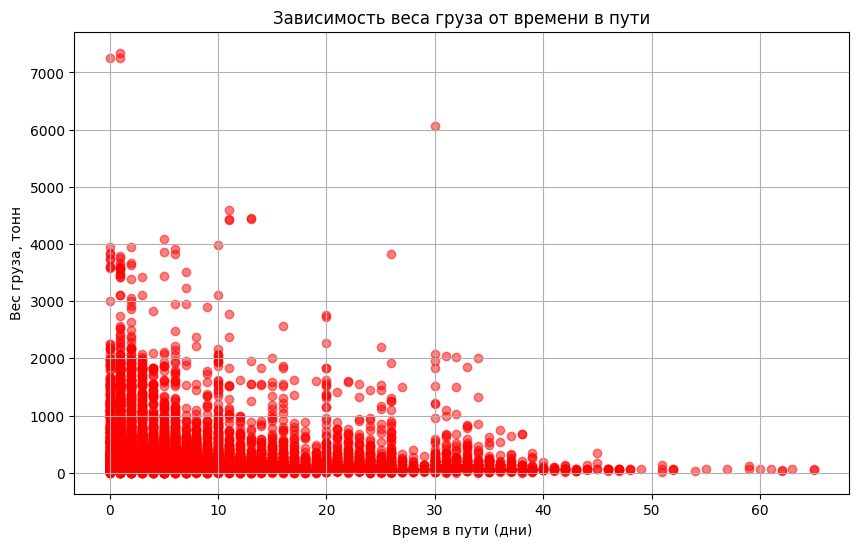

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(train_copy_enc['Разница в днях'], train_copy_enc['Вес груза, тонн'], alpha=0.5, c='#FF0000')
plt.title('Зависимость веса груза от времени в пути')
plt.xlabel('Время в пути (дни)')
plt.ylabel('Вес груза, тонн')
plt.grid(True)
plt.show()

In [45]:
label_endcoder = LabelEncoder()


for i in train_copy_enc.columns:
    
    if i not in  ['Dostavka_3_day','Разница в днях','Тонно-километры','Вес груза, тонн']: 
        train_copy_enc[i] = label_endcoder.fit_transform(train_copy_enc[i])
train_copy_enc

,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Станция назначения,Регион поставки,Ж/Д поставки,Клиент,ОКПО отправителя,Наименование груза,"Вес груза, тонн",...,Тонно-километры,Характер перевозок,Станция отправления загран,Станция назначения загран,Отч мес,Отч год,Страна отправления,Страна назначения,Разница в днях,Dostavka_3_day
0,353,18,5,470,1,5,159,143,11,67.460,...,45536,3,72,59,0,0,17,18,1,0
1,353,18,5,470,1,5,159,143,11,67.680,...,45684,3,72,59,0,0,17,18,2,0
2,353,18,5,470,1,5,159,143,11,265.350,...,179112,3,72,59,0,0,17,18,1,0
3,353,18,5,470,1,5,159,143,11,66.688,...,45014,3,72,4,0,0,17,16,2,0
4,353,18,5,470,1,5,159,143,11,67.520,...,45576,3,72,4,0,0,17,16,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,334,40,0,20,12,0,424,374,16,529.997,...,102306,0,0,0,0,0,17,29,1,0
36189,334,40,0,595,38,0,424,374,16,187.974,...,0,0,0,0,0,0,17,29,0,0
36190,164,65,4,826,67,4,418,46,16,30.600,...,2718,0,0,0,0,0,17,29,2,0
36191,172,39,8,306,37,8,12,379,16,208.010,...,0,0,0,0,0,0,17,29,2,0


In [203]:
train_copy_enc.columns

Index(['Станция отправления', 'Регион отгрузки', 'Ж/Д отгрузки',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки', 'Клиент',
       'ОКПО отправителя', 'Наименование груза', 'Вес груза, тонн',
       'Количество вагонов', 'Тонно-километры', 'Характер перевозок',
       'Станция отправления загран', 'Станция назначения загран', 'Отч мес',
       'Отч год', 'Страна отправления', 'Страна назначения', 'Разница в днях',
       'Dostavka_3_day'],
      dtype='object')

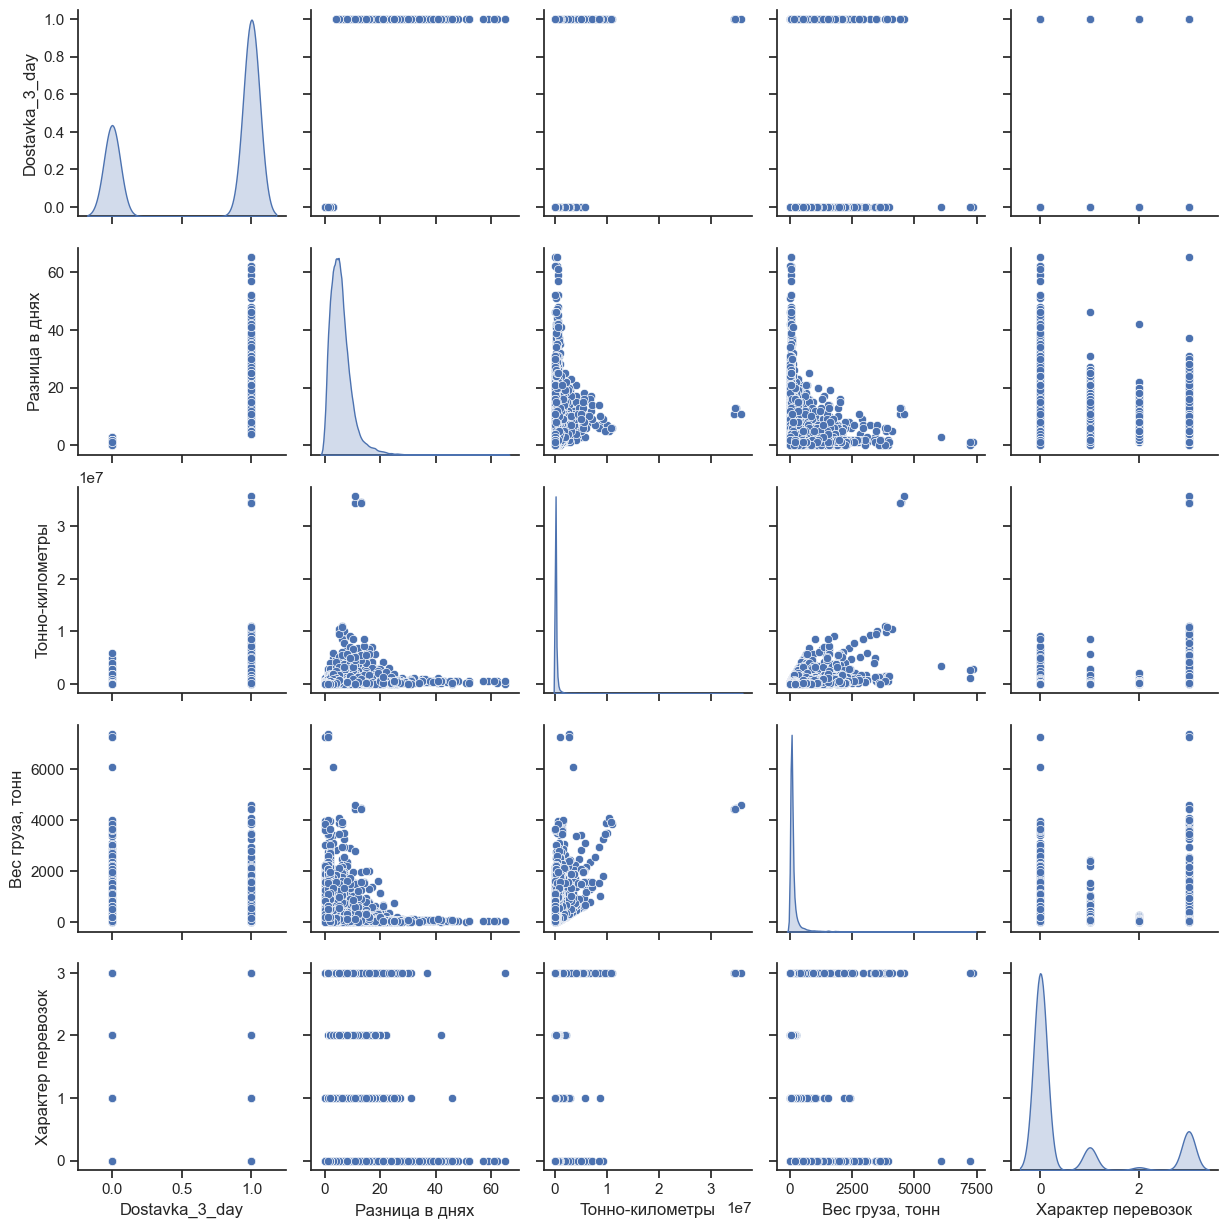

In [22]:
sns.set(style="ticks")
sns.pairplot(train_copy_enc[['Dostavka_3_day','Разница в днях','Тонно-километры','Вес груза, тонн','Характер перевозок']], diag_kind='kde')
plt.show()

In [46]:
X = train_copy_enc.drop(['Dostavka_3_day','Разница в днях'],axis = 1)
y = train_copy_enc['Dostavka_3_day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [47]:
print('Размер обучающей выборки', X_train.shape)
print('Размер тестовой выборки', X_test.shape)

Размер обучающей выборки (24340, 19)
Размер тестовой выборки (6086, 19)


In [25]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Создайте модель градиентного бустинга
model = GradientBoostingClassifier()  # Можете настраивать количество деревьев и другие параметры
parameters = {'n_estimators': [100, 200,225], 'learning_rate': [0.1, 0.2,0.16], 'max_depth': [3, 4, 5]}

# Обучение модели с использованием GridSearchCV
grid_search = GridSearchCV(model, parameters, scoring={'accuracy': make_scorer(accuracy_score)}, refit='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Получение результатов
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Оценка на тестовых данных

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9043706868222149


In [26]:
best_estimator

GradientBoostingClassifier(learning_rate=0.16, max_depth=5, n_estimators=225)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.816628327308577


C:\Users\alex1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 150)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8465330266184686


In [30]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7280644101215905


In [31]:
# модель метод опорных векторов
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7821229050279329


In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    scoring='accuracy',
    cv=cv,
    verbosity=2,
    random_state=1,
    n_jobs=-1
)

C:\Users\alex1\AppData\Local\Programs\Python\Python310\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [36]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8412073764494215

Generation 2 - Current best internal CV score: 0.8412073764494215

Generation 3 - Current best internal CV score: 0.8412073764494215

Generation 4 - Current best internal CV score: 0.8412073764494215

Generation 5 - Current best internal CV score: 0.8412073764494215

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.45, min_samples_leaf=3, min_samples_split=13, n_estimators=100)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
best_model = ExtraTreesClassifier( bootstrap=False, max_features=0.45, min_samples_leaf=3, min_samples_split=13, n_estimators=100)
best_model.fit(X_train, y_train)
# make predictions
y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9004272099901413


In [33]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bst = XGBClassifier(n_estimators=10, max_depth=3, learning_rate=0.16, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8453828458757805


In [52]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

catboost = CatBoostClassifier(loss_function='Logloss', iterations=1500, learning_rate=0.09, depth=4)

catboost.fit(X_train, y_train, verbose=100)

# Получаем предсказания для тестовых данных
y_pred = catboost.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

0:	learn: 0.6455594	total: 10.1ms	remaining: 15.1s
100:	learn: 0.2817552	total: 882ms	remaining: 12.2s
200:	learn: 0.2469315	total: 1.67s	remaining: 10.8s
300:	learn: 0.2292299	total: 2.47s	remaining: 9.84s
400:	learn: 0.2175818	total: 3.22s	remaining: 8.83s
500:	learn: 0.2086377	total: 3.96s	remaining: 7.89s
600:	learn: 0.2015684	total: 4.68s	remaining: 7.01s
700:	learn: 0.1953667	total: 5.43s	remaining: 6.19s
800:	learn: 0.1905171	total: 6.2s	remaining: 5.41s
900:	learn: 0.1858218	total: 6.92s	remaining: 4.6s
1000:	learn: 0.1815580	total: 7.65s	remaining: 3.81s
1100:	learn: 0.1781018	total: 8.4s	remaining: 3.04s
1200:	learn: 0.1748964	total: 9.26s	remaining: 2.31s
1300:	learn: 0.1717020	total: 10s	remaining: 1.54s
1400:	learn: 0.1684175	total: 10.8s	remaining: 764ms
1499:	learn: 0.1656101	total: 11.5s	remaining: 0us
Accuracy: 0.9058494906342425


In [18]:
!pip install networkx

Text(0.5, 1.0, 'Partial Dependence Plot')

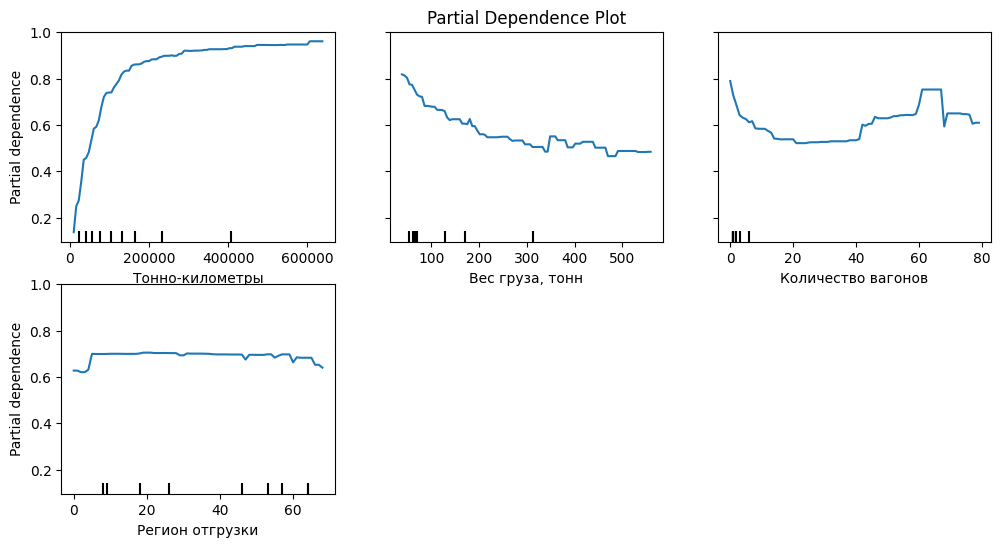

In [49]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
fix, ax = plt.subplots(figsize=(12, 6))

display = PartialDependenceDisplay.from_estimator(
    catboost, X, ["Тонно-километры", "Вес груза, тонн",'Количество вагонов','Регион отгрузки'], ax=ax
)

ax.set_title("Partial Dependence Plot")



In [30]:
X

,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Станция назначения,Регион поставки,Ж/Д поставки,Клиент,ОКПО отправителя,Наименование груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Характер перевозок,Станция отправления загран,Станция назначения загран,Отч мес,Отч год,Страна отправления,Страна назначения
0,353,18,5,470,1,5,159,143,11,67.460,1,45536,3,72,59,0,0,17,18
1,353,18,5,470,1,5,159,143,11,67.680,1,45684,3,72,59,0,0,17,18
2,353,18,5,470,1,5,159,143,11,265.350,4,179112,3,72,59,0,0,17,18
3,353,18,5,470,1,5,159,143,11,66.688,1,45014,3,72,4,0,0,17,16
4,353,18,5,470,1,5,159,143,11,67.520,1,45576,3,72,4,0,0,17,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,334,40,0,20,12,0,424,374,16,529.997,59,102306,0,0,0,0,0,17,29
36189,334,40,0,595,38,0,424,374,16,187.974,59,0,0,0,0,0,0,17,29
36190,164,65,4,826,67,4,418,46,16,30.600,18,2718,0,0,0,0,0,17,29
36191,172,39,8,306,37,8,12,379,16,208.010,62,0,0,0,0,0,0,17,29


In [53]:
import shap
explainer_your_model = shap.Explainer(catboost)
shap_values_your_model = explainer_your_model.shap_values(X_test)

# SHAP для TPOT модели
explainer_tpot = shap.Explainer(best_model)
shap_values_tpot = explainer_tpot.shap_values(X_test)

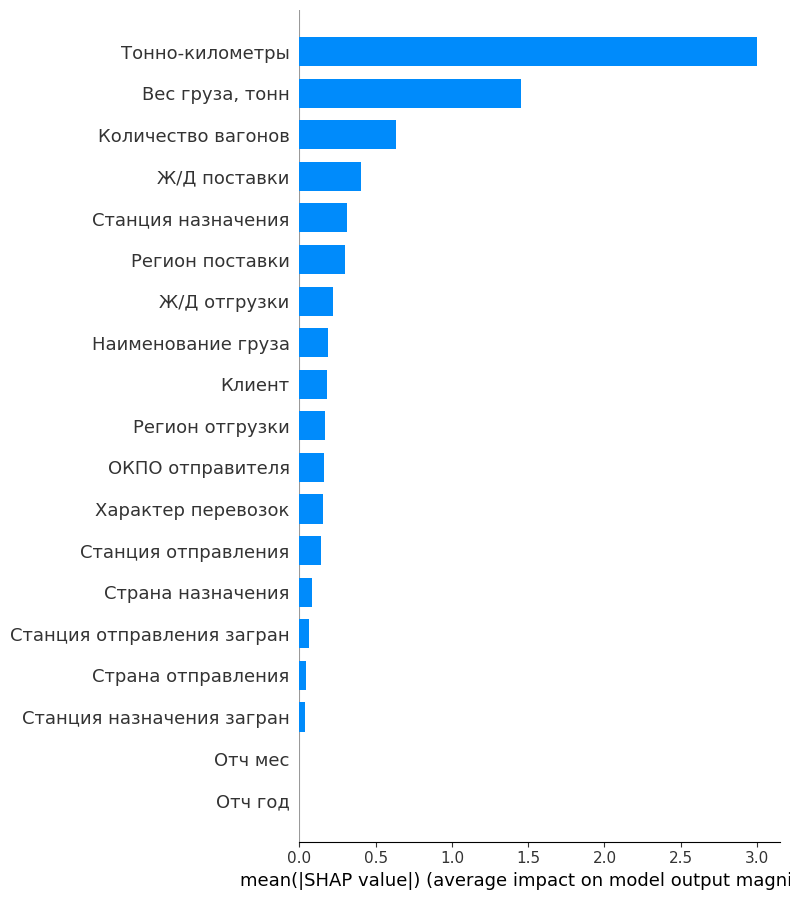

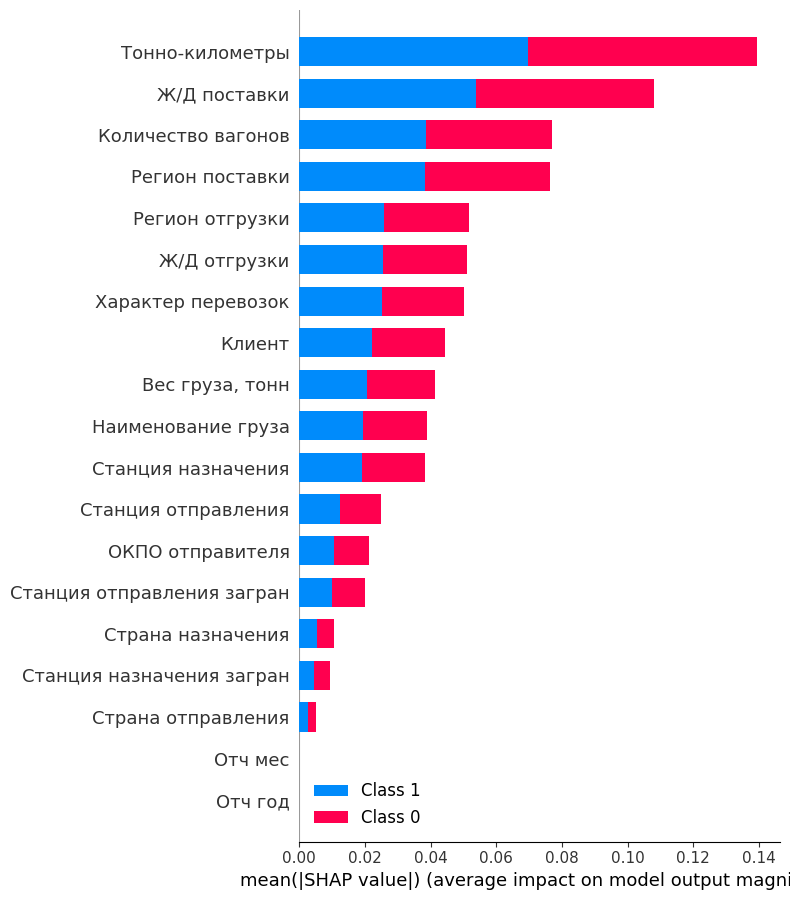

In [54]:
# График для нашей модели
shap.summary_plot(shap_values_your_model, X_test, plot_type="bar")

# График для TPOT модели
shap.summary_plot(shap_values_tpot, X_test, plot_type="bar")

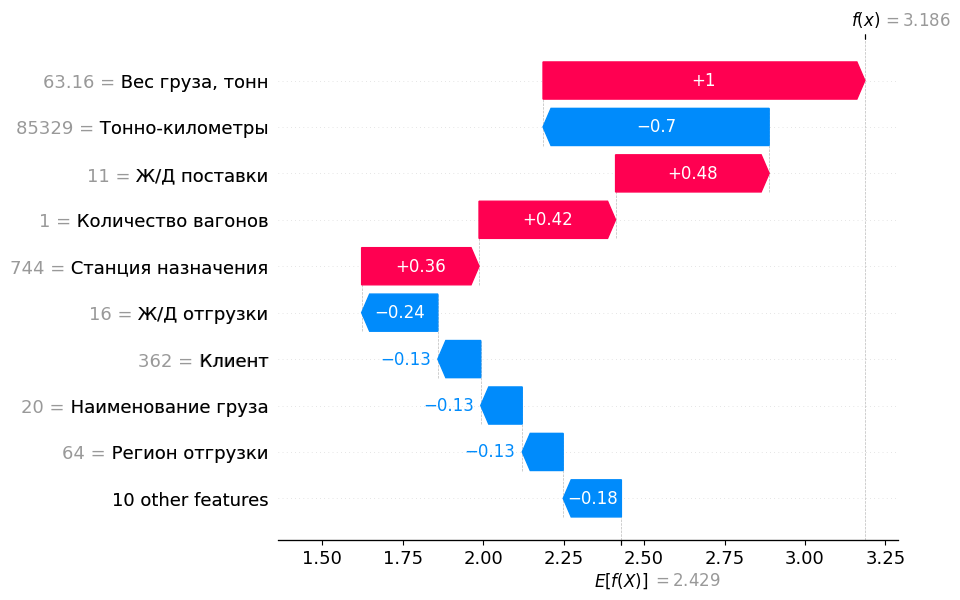

In [59]:
min_ves_index = train_copy_enc['Вес груза, тонн'].idxmin()

explainer = shap.Explainer(catboost)
shap_values = explainer(X)

# диаграмма “водопад” для наблюдения с самой маленькой Вес груза, тон
shap.plots.waterfall(shap_values[min_ves_index])

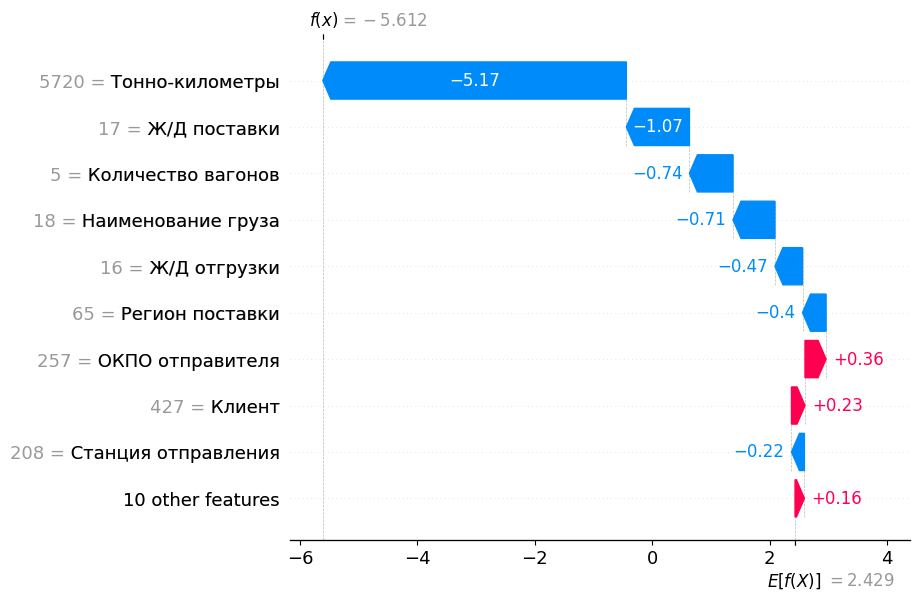

In [60]:
max_popularity_index = train_copy_enc['Вес груза, тонн'].idxmax()

explainer = shap.Explainer(catboost)
shap_values = explainer(X)

# диаграмма “водопад” для наблюдения с самой большой Вес груза, тон
shap.plots.waterfall(shap_values[max_popularity_index-4000])